In [1]:
from sklearn.cluster import MeanShift, estimate_bandwidth
from sklearn.datasets import make_blobs as mb
import matplotlib.pyplot as plt
from itertools import cycle
import numpy as np

In [2]:
#Sample data points
cen = ((1, .75), (-.75, -1), (1, -1)) 
x_train, _ = mb(n_samples=10000, centers= cen, cluster_std=0.6)

In [3]:
# Bandwidth estimation using in-built function
est_bandwidth = estimate_bandwidth(x_train, quantile=.1, n_samples=500)
est_bandwidth

0.6757611555383322

In [4]:
mean_shift = MeanShift(bandwidth= est_bandwidth, bin_seeding=True)
mean_shift.fit(x_train)
ms_labels = mean_shift.labels_
cluster_centers = mean_shift.cluster_centers_
labels_unique = np.unique(ms_labels)
n_clusters_ = len(labels_unique)
print('centers: ', cluster_centers)
print('number of estimated clusters :', n_clusters_)

centers:  [[ 0.91587251 -0.88785125]
 [ 0.98879874  0.65060983]
 [-0.64796572 -0.98742104]]
number of estimated clusters : 3


**************************************************
b
g
[0.66471195 1.60193508 1.14508371 ... 0.47729603 0.71249105 1.33742761] [-0.11637308 -0.49800594 -1.49171976 ... -0.73188668 -1.26258039
 -1.26382301]
[0.65347583 1.00539546 0.46937617 ... 0.49692036 1.25819349 1.22852495] [0.98563057 1.31191402 0.34117771 ... 1.66214567 1.18265014 0.75361206]
[-0.78578326 -0.94052926 -0.66326142 ... -0.70898722 -1.39980626
 -1.31537213] [ 0.16302115 -1.25886391 -1.34396915 ... -1.37888308 -0.48053645
 -0.53952907]


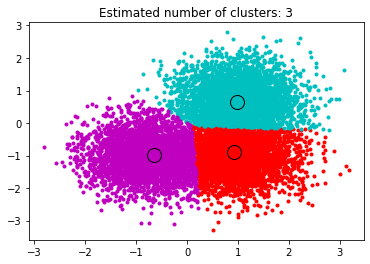

In [5]:
plt.figure(1)
plt.clf()

colors = cycle('bgrcmykbgrcmykbgrcmykbgrcmyk')
print("*"*50)
print(next(colors))
print(next(colors))
# cycle Создать итератор
for k, col in zip(range(n_clusters_), colors):
    my_members = ms_labels == k
    cluster_center = cluster_centers[k]
    print(x_train[my_members, 0], x_train[my_members, 1])
    plt.plot(x_train[my_members, 0], x_train[my_members, 1], col + '.')
    plt.plot(cluster_center[0], cluster_center[1], 'o', markerfacecolor=col,
             markeredgecolor='k', markersize=14)
plt.title('Estimated number of clusters: %d' % n_clusters_)
plt.show()